<a href="https://colab.research.google.com/github/jdmartinezrs/MachineLearningAlgoritms/blob/main/KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, confusion_matrix,
                             classification_report, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sheet_id = "1r4szNXN8abPstdpZEtuePc89H6AJPgjq"
sheet_url = f"https://drive.google.com/uc?id={sheet_id}&export=csv"
df = pd.read_csv(sheet_url)

In [4]:
df.rename(columns={
    'Ult Km/Hr': 'Ult_Km',
    'Tipo de Vehiculo': 'Tipo_Vehiculo',
    'Km/Hr Pend': 'Km_Pend',
    'Progreso': 'Progreso'
}, inplace=True)

In [5]:
df['Km_Pend_cls'] = pd.cut(
    df['Km_Pend'],
    bins=[-np.inf, 1000, 5000, np.inf],
    labels=['Bajo', 'Medio', 'Alto']
).astype('category')

In [6]:
features = ['Ult_Km', 'Tipo_Vehiculo', 'Progreso']
X = df[features]
y = df['Km_Pend_cls']                      # ya categórico


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), ['Ult_Km', 'Progreso']),
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['Tipo_Vehiculo'])
])

In [9]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Ult_Km', 'Progreso']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Tipo_Vehiculo'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

              precision    recall  f1-score   support

        Alto       0.97      0.97      0.97       109
       Medio       0.97      0.97      0.97        91

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



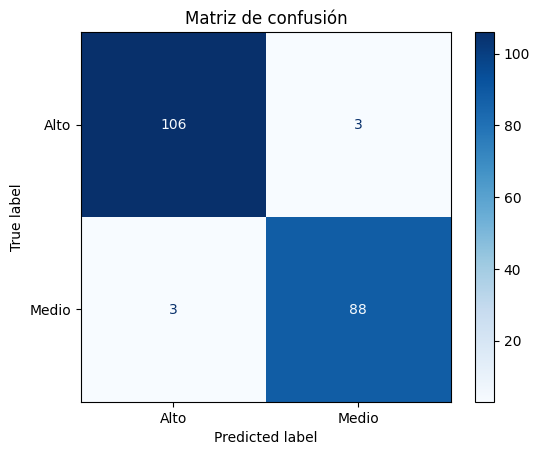

In [10]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=2))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

In [34]:
# ⚙️ Ejemplo manual
nuevo_ejemplo = pd.DataFrame([{
    'Ult_Km': 246384,
    'Tipo_Vehiculo': 'TRACTOCAMION',
    'Progreso': 0.2143
}])

# 🧠 Usamos el pipeline entrenado
prediccion = model.predict(nuevo_ejemplo)

print("Clasificación del nuevo ejemplo:", prediccion[0])


Clasificación del nuevo ejemplo: Medio


In [31]:
df['Km_Pend_cls'].value_counts()


,count
Km_Pend_cls,
Alto,547
Medio,453
Bajo,0


In [32]:
df['Km_Pend'].min()


1029.0

In [33]:
df[df['Km_Pend_cls'] == 'Medio'].sample(5)


,Fecha,ITEM,CODIGO DE EQUIPO,Tipo_Vehiculo,fecha de revision,Km/ Hr Plan,Fecha Ult Pre-Operacional,Dias Pend,Ult_Km,Km/Hr Cambio,Fecha Cambio,Fecha Prox Cambio,Unnamed: 12,Km/Hr Proyectada,Km_Pend,Progreso,Unnamed: 16,Observaciones,Km_Pend_cls
809,2025-03-17,810,VE-DT-FL-XMD295,TRACTOCAMION,2025-03-17,10000.0,2024-05-04,317,246384,234378,2024-03-31,2025-07-06,2026-01-02,248527.0,2143.0,0.2143,question,Of man last brother situation own.,Medio
194,2025-05-17,195,VE-DT-CH-XMD828,IRRIGADOR,2025-05-17,10000.0,2025-02-03,103,239232,224709,2024-09-13,2026-03-23,2026-09-19,242193.0,2961.0,0.2961,choose,West without service develop health.,Medio
723,2025-04-29,724,VE-DT-FL-XMD396,IRRIGADOR,2025-04-29,10000.0,2024-07-15,288,341104,338529,2023-11-25,2025-10-18,2026-04-16,344857.0,3753.0,0.3753,size,Play it line choice sell Congress.,Medio
439,2025-03-06,440,VE-DT-FL-XMD764,TRACTOCAMION,2025-03-06,10000.0,2024-02-02,398,221427,218711,2023-11-18,2025-07-14,2026-01-10,226397.0,4970.0,0.4970,child,Score experience us sea thus.,Medio
288,2024-08-30,289,VE-DT-FL-XMD401,VOLQ SENCILLA,2024-08-30,10000.0,2024-05-19,103,320756,316133,2024-02-08,2025-04-08,2025-10-05,325293.0,4537.0,0.4537,everyone,Design civil involve real what article size pay.,Medio


In [35]:
df[df['Km_Pend_cls'] == 'Alto'].sample(5)

,Fecha,ITEM,CODIGO DE EQUIPO,Tipo_Vehiculo,fecha de revision,Km/ Hr Plan,Fecha Ult Pre-Operacional,Dias Pend,Ult_Km,Km/Hr Cambio,Fecha Cambio,Fecha Prox Cambio,Unnamed: 12,Km/Hr Proyectada,Km_Pend,Progreso,Unnamed: 16,Observaciones,Km_Pend_cls
749,2024-12-09,750,VE-DT-HR-XMD730,IRRIGADOR,2024-12-09,10000.0,2023-07-17,511,193152,185379,2022-10-14,2025-10-03,2026-04-01,198773.0,5621.0,0.5621,wide,Either would dog its open.,Alto
498,2025-04-22,499,VE-DT-CM-XMD693,DOBLETROQUE,2025-04-22,10000.0,2023-11-27,512,290392,284362,2023-06-22,2025-06-14,2025-12-11,296894.0,6502.0,0.6502,white,Candidate trouble response law enough those fu...,Alto
349,2025-02-09,350,VE-DT-HR-XMD519,DOBLETROQUE,2025-02-09,10000.0,2023-11-26,441,308965,305830,2023-10-26,2025-05-04,2025-10-31,316004.0,7039.0,0.7039,race,Half lot my.,Alto
274,2025-01-25,275,VE-DT-CH-XMD965,GRUA,2025-01-25,10000.0,2024-10-23,94,220228,217133,2023-11-05,2025-03-03,2025-08-30,227226.0,6998.0,0.6998,wide,Between level able yard same individual.,Alto
224,2025-04-01,225,VE-DT-HR-XMD870,GRUA,2025-04-01,10000.0,2023-11-01,517,297528,293107,2023-02-04,2025-12-25,2026-06-23,306564.0,9036.0,0.9036,understand,Executive rich wrong control professor data.,Alto
